In [1]:
from JupyterImport import *
from src.DataStandardize.ExpSpecific.Sep20 import Fixes
root_logger.setLevel(logging.WARNING)

In [35]:
# dats = get_dats((2986, 2993+1))  # Testing Entropy with RCSQ/RCSS HQPC. 50mK, 0mT, 125mV bias

# dats = get_dats((2994, 3161+1))  # Entropy vs temp using RCSQ/RCSS HQPC, 0mT, 50, 100, 175, 250mK

# dats = get_dats((3162, 3221+1)) # Same as above with -50mT one full set, another up to 100mK

# dats = get_dats((3230, 3417+1))  # Small steps in field around -50mT
# dats.extend(get_dats((3418, 3455+1)))  # Start of next loop through

dats = get_dats((3456, 3907+1))  # 0.1mT steps in field around -20mT at 100mK
# dats = get_dats((3456, 3665+1))

for dat in dats:
    Fixes.fix_magy(dat)
    
dat_dict = {dat.datnum: dat for dat in dats}
p1_dats = dats[::2]
dat_pairs = [(dat, dat_dict[dat.datnum+1]) for dat in p1_dats]

100% (452 of 452) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [29]:
for dat in dats:
    print(f'Dat{dat.datnum}: Field={dat.Logs.magy.field:.2f}mT')

Dat3456: Field=-20.98mT
Dat3457: Field=-20.98mT
Dat3458: Field=-20.98mT
Dat3459: Field=-20.98mT
Dat3460: Field=-20.98mT
Dat3461: Field=-20.98mT
Dat3462: Field=-20.98mT
Dat3463: Field=-20.98mT
Dat3464: Field=-20.98mT
Dat3465: Field=-20.98mT
Dat3466: Field=-20.88mT
Dat3467: Field=-20.88mT
Dat3468: Field=-20.88mT
Dat3469: Field=-20.88mT
Dat3470: Field=-20.88mT
Dat3471: Field=-20.88mT
Dat3472: Field=-20.88mT
Dat3473: Field=-20.88mT
Dat3474: Field=-20.88mT
Dat3475: Field=-20.88mT
Dat3476: Field=-20.78mT
Dat3477: Field=-20.78mT
Dat3478: Field=-20.78mT
Dat3479: Field=-20.78mT
Dat3480: Field=-20.78mT
Dat3481: Field=-20.78mT
Dat3482: Field=-20.78mT
Dat3483: Field=-20.78mT
Dat3484: Field=-20.78mT
Dat3485: Field=-20.78mT
Dat3486: Field=-20.67mT
Dat3487: Field=-20.67mT
Dat3488: Field=-20.67mT
Dat3489: Field=-20.67mT
Dat3490: Field=-20.67mT
Dat3491: Field=-20.67mT
Dat3492: Field=-20.67mT
Dat3493: Field=-20.67mT
Dat3494: Field=-20.67mT
Dat3495: Field=-20.67mT
Dat3496: Field=-20.58mT
Dat3497: Field=-

In [18]:
recalculate = False

analysis_params = EA.EA_params(bin_data=False, num_per_row=500,
                            sub_line=False, sub_line_range=(-4000, -300),
                            int_entropy_range=(400, 1000),
                            allowed_amp_range=(0.8, 1.2), default_amp=1.05,
                            allowed_dT_range=(1, 50), default_dT=2.7,
                            CT_fit_range=(None, None),
                            fit_param_edit_kwargs=dict(),
                            E_fit_range=(-500, 500))


for pair in progressbar(dat_pairs):
    if recalculate or not hasattr(pair[0].Other, 'EA_values'):
        EA.standard_square_process(pair, analysis_params)

N/A% (0 of 226) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--WARNING:src.DatObject.Attributes.Transition:LinAlgError encountered, retrying
D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\DatObject\Attributes\SquareEntropy.py:522: RuntimeWarning:

Mean of empty slice

 87% (198 of 226) |###################   | Elapsed Time: 0:00:00 ETA:   0:00:00WARNING:src.DatObject.Attributes.Transition:LinAlgError encountered, retrying
 88% (199 of 226) |###################   | Elapsed Time: 0:00:00 ETA:   0:00:00WARNING:src.DatObject.Attributes.Transition:LinAlgError encountered, retrying
 88% (200 of 226) |###################   | Elapsed Time: 0:00:01 ETA:   0:00:00WARNING:src.DatObject.Attributes.Transition:LinAlgError encountered, retrying
 88% (201 of 226) |###################   | Elapsed Time: 0:00:01 ETA:   0:00:00WARNING:src.DatObject.Attributes.Transition:LinAlgError encountered, retrying
 89% (202 of 226) |###################   | Elapsed Time: 0:00:01 ETA:   0:00:00WAR

In [ ]:
which = ['transition', 'entropy'] #, 'integrated']
# which = ['transition']

figt = EA.Plots.waterfall(dats, which='transition', mode='lines', add_fits=False, shift_per=0.025)
fige = EA.Plots.waterfall(dats, which='entropy', mode='lines', add_fits=True, shift_per=0.025)


figt.show()
fige.show()

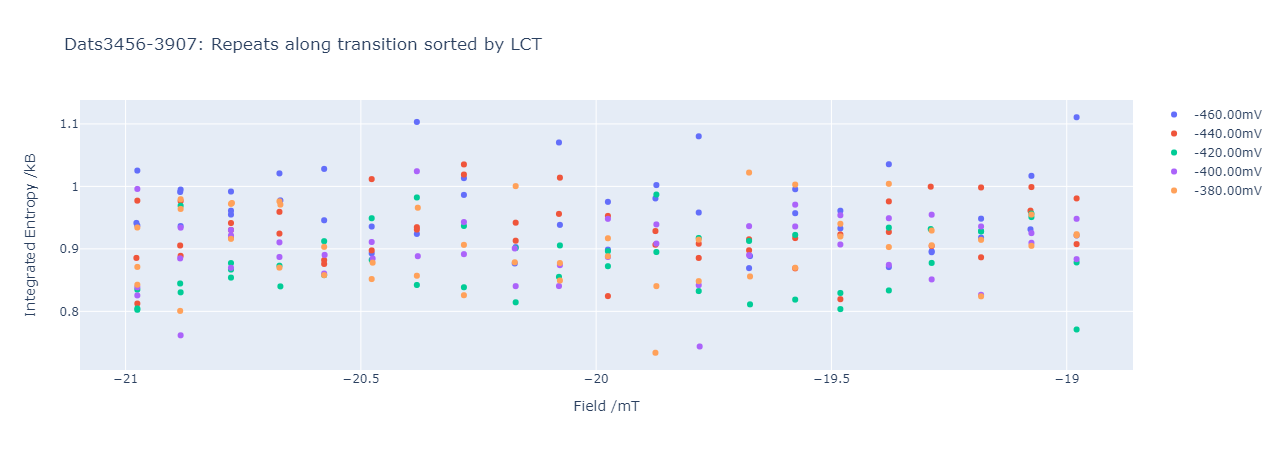

In [41]:
fig = go.Figure()

which_sort = 'lct'
which_x = 'field'
which_y = 'int_ds'

if which_sort.lower() == 'temp':
    name = 'Temp'
    units = 'mK'
    array = (50, 100, 175, 250)
    get_val = lambda dat: dat.Logs.temps.mc*1000
    tol = 10
elif which_sort.lower() == 'field':
    name = 'Field'
    units = 'mT'
#     array = np.linspace(-188, -212, 25)
#     array = np.linspace(-55, -45, 21)
#     array = np.linspace(-25, -15, 21)
    array = np.linspace(-21, -19, 21)
    get_val = lambda dat: dat.Logs.magy.field
    tol = 0.05
elif which_sort.lower() == 'lct':
    name = 'LCT'
    units = 'mV'
    array = np.linspace(-460, -380, 5)
    get_val = lambda dat: dat.Logs.fds['LCT']
    tol = 5
elif which_sort.lower() == 'hqpc':
    name = 'HQPC bias'
    units = 'mV'
    array = np.linspace(117.5, 122.5, 11)
    get_val = lambda dat: dat.AWG.AWs[0][0][1]
    tol = 0.2
else:
    raise ValueError

if which_x.lower() == 'lct':
    get_x = lambda dat: dat.Logs.fds['LCT']
    x_title = 'LCT /mV'
elif which_x.lower() == 'field':
    get_x = lambda dat: dat.Logs.magy.field
    x_title = 'Field /mT'
elif which_x.lower() == 'temp':
    get_x = lambda dat: dat.Logs.temps.mc*1000
    x_title = 'MC Temp /mK'
elif which_x.lower() == 'hqpc':
    get_x = lambda dat: dat.AWG.AWs[0][0][1]
    x_title = 'HQPC bias /mV'
else:
    raise ValueError
    
if which_y.lower() == 'dt':
    get_y = lambda values: values.dTs
    y_title = 'dT /mV'
elif which_y.lower() == 'fit_ds':
    get_y = lambda values: values.dSs
    y_title = 'Fit Entropy /kB'
elif which_y.lower() == 'int_ds':
    get_y = lambda values: values.int_dSs
    y_title = 'Integrated Entropy /kB'
else:
    raise ValueError

for val in array:
    ds = [dat for dat in dats if np.isclose(get_val(dat), val, atol=tol)]
    dps = [pair for pair in dat_pairs if np.isclose(get_val(pair[0]), val, atol=tol)]
    values = EA.EA_values.from_dats(ds)
    x = [get_x(p[0]) for p in dps]
    y = get_y(values)
    datnums = [p[0].datnum for p in dps]
    base_hover_template = 'Datnum: %{customdata}<br>'
    hover_template = base_hover_template+x_title+': %{x:.4f}<br>'+y_title+': %{y:.2f}'
    fig.add_trace(go.Scatter(x=x, y=y, name=f'{val:.2f}{units}', mode='markers', customdata=datnums,  hovertemplate = hover_template))
#     fig.add_trace(go.Scatter(x=x, y=values.dTs, mode='markers'))
fig.update_layout(title=f'Dats{dats[0].datnum}-{dats[-1].datnum}: Repeats along transition sorted by {name}', xaxis_title=x_title, yaxis_title=y_title)
fig.show()
    


In [ ]:
save_graph=True
if save_graph:
    fig.write_html(export_path+f'Dats{dats[0].datnum}-{dats[-1].datnum} -- Entropy Repeats along transition various {name}.html')

In [16]:
dats[0].Logs.part_of

array([1, 2])